In [95]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [70]:
data=pd.read_csv('nyc_311_data_subset.csv')

/Users/kash/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
0,1,10/11/16 11:53,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
1,2,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
2,3,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
3,4,10/11/16 12:39,10/11/16 12:39,DSNY,NaN,QUEENS,NaN,NaN
4,5,10/11/16 12:18,10/11/16 12:18,DSNY,NaN,QUEENS,NaN,NaN


In [72]:
data

,Unique Key,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
0,1,10/11/16 11:53,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
1,2,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
2,3,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
3,4,10/11/16 12:39,10/11/16 12:39,DSNY,NaN,QUEENS,NaN,NaN
4,5,10/11/16 12:18,10/11/16 12:18,DSNY,NaN,QUEENS,NaN,NaN
5,6,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
6,7,10/11/16 12:39,10/11/16 12:39,DSNY,NaN,QUEENS,NaN,NaN
7,8,10/11/16 11:44,NaN,DSNY,NaN,QUEENS,NaN,NaN
8,9,10/11/16 12:35,10/11/16 12:35,DSNY,NaN,QUEENS,NaN,NaN
9,10,10/11/16 11:26,5/27/16 12:00,DSNY,NaN,QUEENS,NaN,NaN


In [ ]:
#as noted above there are inconsistancies within the dataset and looking at the info we can see this clearly 

In [73]:
#let's make unique key an index since the values are indeed unique
data=pd.read_csv('nyc_311_data_subset.csv',index_col='Unique Key')

/Users/kash/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
data[1:10]

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
Unique Key,,,,,,,
2,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
3,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
4,10/11/16 12:39,10/11/16 12:39,DSNY,NaN,QUEENS,NaN,NaN
5,10/11/16 12:18,10/11/16 12:18,DSNY,NaN,QUEENS,NaN,NaN
6,10/11/16 11:36,10/11/16 12:00,DSNY,NaN,QUEENS,NaN,NaN
7,10/11/16 12:39,10/11/16 12:39,DSNY,NaN,QUEENS,NaN,NaN
8,10/11/16 11:44,NaN,DSNY,NaN,QUEENS,NaN,NaN
9,10/11/16 12:35,10/11/16 12:35,DSNY,NaN,QUEENS,NaN,NaN
10,10/11/16 11:26,5/27/16 12:00,DSNY,NaN,QUEENS,NaN,NaN


In [10]:
#the notice above said that colum 4 has mixed types so let's look closer and see what we can find
data['Incident Zip'].unique()

array([nan, '10001', '11691', '11211', '10027', '10452', '11428', '11101',
       '10075', '11215', '11210', '11231', '11217', '10457', '10033',
       '11209', '11201', '11367', '10029', '10021', '10028', '10034',
       '10032', '10039', '11414', '10461', '11229', '10462', '11223',
       '10023', '10453', '11225', '11219', '10451', '11234', '10014',
       '11354', '11361', '10468', '11233', '10466', '11204', '11413',
       '11224', '11375', '11040', '11232', '11203', '11205', '11434',
       '10011', '10003', '10025', '10013', '10036', '11237', '11355',
       '11368', '10454', '10456', '10463', '11222', '11228', '11216',
       '10128', '11435', '11419', '11358', '11421', '10019', '11238',
       '11213', '11235', '11420', '10038', '11226', '10472', '10016',
       '11221', '11236', '11436', '11214', '11377', '11385', '11365',
       '10312', '11426', '11373', '11218', '10005', '11230', '10026',
       '10473', '10280', '10301', '10309', '10310', '10009', '10002',
       '11433',

In [75]:
#we can see from the values, there are mixed between strings, floats, ints etc
#lets write a function to deal with these mixed zips
def fix_zip(input_zip):
    try:
        input_zip=int(float(input_zip))
    except:
        try:
            input_zip=int(input_zip.split('_')[0])
        except:
            return np.NaN
    if input_zip < 10000 or input_zip > 19999:
        return np.NaN
    return str(input_zip)   

In [76]:
#lets test this function
fix_zip(10120.0)

'10120'

In [77]:
#we ran this function on the different types of zips and it works. so let's run the incident zip column
data['Incident Zip']=data['Incident Zip'].apply(fix_zip)

In [17]:
data['Incident Zip'].unique()

array([nan, '10001', '11691', '11211', '10027', '10452', '11428', '11101',
       '10075', '11215', '11210', '11231', '11217', '10457', '10033',
       '11209', '11201', '11367', '10029', '10021', '10028', '10034',
       '10032', '10039', '11414', '10461', '11229', '10462', '11223',
       '10023', '10453', '11225', '11219', '10451', '11234', '10014',
       '11354', '11361', '10468', '11233', '10466', '11204', '11413',
       '11224', '11375', '11040', '11232', '11203', '11205', '11434',
       '10011', '10003', '10025', '10013', '10036', '11237', '11355',
       '11368', '10454', '10456', '10463', '11222', '11228', '11216',
       '10128', '11435', '11419', '11358', '11421', '10019', '11238',
       '11213', '11235', '11420', '10038', '11226', '10472', '10016',
       '11221', '11236', '11436', '11214', '11377', '11385', '11365',
       '10312', '11426', '11373', '11218', '10005', '11230', '10026',
       '10473', '10280', '10301', '10309', '10310', '10009', '10002',
       '11433',

In [78]:
#now we can clearly see that the values are formatted and clean
#now let's remove nan's 
data=data[data['Incident Zip'].notnull()]

In [79]:
data

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude
Unique Key,,,,,,,
11,9/1/16 0:33,9/16/16 1:06,DCA,10001,MANHATTAN,40.744790,-73.988834
12,9/1/16 20:16,9/10/16 18:08,HPD,11691,QUEENS,40.600554,-73.750704
13,9/1/16 12:17,9/7/16 12:00,DSNY,11211,BROOKLYN,40.704925,-73.962007
14,9/1/16 12:10,9/10/16 14:23,HPD,10027,MANHATTAN,40.812322,-73.955338
15,9/1/16 12:32,9/11/16 2:03,HPD,10452,BRONX,40.839529,-73.922534
16,9/1/16 20:16,9/10/16 18:08,HPD,11691,QUEENS,40.600554,-73.750704
17,9/1/16 8:35,9/7/16 12:00,DSNY,11428,QUEENS,40.721866,-73.745982
18,9/1/16 13:19,9/16/16 14:32,DOT,11101,QUEENS,40.746875,-73.952711
19,9/1/16 11:00,9/8/16 12:00,DSNY,10075,MANHATTAN,40.773336,-73.955054


In [80]:
#let's take a look at the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910895 entries, 11 to 971063
Data columns (total 7 columns):
Created Date    910895 non-null object
Closed Date     829442 non-null object
Agency          910895 non-null object
Incident Zip    910895 non-null object
Borough         910895 non-null object
Latitude        887168 non-null float64
Longitude       887168 non-null float64
dtypes: float64(2), object(5)
memory usage: 55.6+ MB


In [81]:
#now that incident zip is clean lets take a look at borough
data['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [82]:
#we see there is a value titles unspecified, let's look a little closer at this
data[data['Borough']=='Unspecified'][['Agency','Incident Zip']]

,Agency,Incident Zip
Unique Key,,
1034,DCA,19044
1671,DCA,11590
4141,TLC,11590
11659,DCA,11743
15666,DCA,13851
17890,TLC,10538
18184,TLC,11516
20323,TLC,11430
21625,DCA,11598


In [83]:
#let's group the incidents based on agency
data[data['Borough']=='Unspecified'].groupby('Agency').count()

,Created Date,Closed Date,Incident Zip,Borough,Latitude,Longitude
Agency,,,,,,
3/1/01,1,1,1,1,1,1
DCA,87,78,87,87,0,0
DFTA,15,12,15,15,2,2
DHS,68,67,68,68,68,68
DOE,1,1,1,1,1,1
DOF,64,64,64,64,3,3
DOHMH,19,0,19,19,19,19
DOT,65,13,65,65,64,64
DPR,70,17,70,70,51,51


In [84]:
#from the above data we can see there the majority of the unspecified incidents come from NYPD
#let's see this as an overall percentage
nypd_complaints_total = data[data['Agency']=='NYPD']['Borough'].count()
nypd_unspecified = data[(data['Borough']=='Unspecified') & (data['Agency']=="NYPD")]['Borough'].count()
percentage = nypd_unspecified/nypd_complaints_total*100
print("%1.2f"%percentage)

0.26


In [85]:
#let's get rid of the unspecified data because it will be hard to explain and coroupt our analysis
data = data[data['Borough'] != 'Unspecified']

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909609 entries, 11 to 971063
Data columns (total 7 columns):
Created Date    909609 non-null object
Closed Date     828362 non-null object
Agency          909609 non-null object
Incident Zip    909609 non-null object
Borough         909609 non-null object
Latitude        886189 non-null float64
Longitude       886189 non-null float64
dtypes: float64(2), object(5)
memory usage: 55.5+ MB


In [87]:
#now let's get rid of the NaN's in the Latitude and Longtitude 
data = data[(data['Latitude'].notnull()) & (data['Longitude'].notnull())  & (data['Closed Date'].notnull())]

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805742 entries, 11 to 971063
Data columns (total 7 columns):
Created Date    805742 non-null object
Closed Date     805742 non-null object
Agency          805742 non-null object
Incident Zip    805742 non-null object
Borough         805742 non-null object
Latitude        805742 non-null float64
Longitude       805742 non-null float64
dtypes: float64(2), object(5)
memory usage: 49.2+ MB


In [89]:
#convert Created Date to a datetime object 
data['Created Date']=data['Created Date'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%y %H:%M'))

In [90]:
data['Created Date'][0:20]

Unique Key
11   2016-09-01 00:33:00
12   2016-09-01 20:16:00
13   2016-09-01 12:17:00
14   2016-09-01 12:10:00
15   2016-09-01 12:32:00
16   2016-09-01 20:16:00
17   2016-09-01 08:35:00
18   2016-09-01 13:19:00
19   2016-09-01 11:00:00
20   2016-09-01 11:45:00
21   2016-09-01 10:11:00
22   2016-09-01 08:22:00
23   2016-09-01 17:31:00
24   2016-09-01 08:50:00
25   2016-09-01 14:19:00
26   2016-09-01 12:46:00
27   2016-09-01 13:33:00
28   2016-09-01 13:51:00
30   2016-09-01 12:34:00
31   2016-09-01 07:03:00
Name: Created Date, dtype: datetime64[ns]

In [91]:
#convert Closed Date to a datetime object 
data['Closed Date']=data['Closed Date'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%y %H:%M'))

In [92]:
data['Closed Date'][0:20]

Unique Key
11   2016-09-16 01:06:00
12   2016-09-10 18:08:00
13   2016-09-07 12:00:00
14   2016-09-10 14:23:00
15   2016-09-11 02:03:00
16   2016-09-10 18:08:00
17   2016-09-07 12:00:00
18   2016-09-16 14:32:00
19   2016-09-08 12:00:00
20   2016-09-03 12:00:00
21   2016-09-16 11:11:00
22   2016-09-16 07:42:00
23   2016-09-16 10:10:00
24   2016-09-16 11:12:00
25   2016-09-16 14:11:00
26   2016-09-16 11:53:00
27   2016-09-16 12:55:00
28   2016-09-11 02:05:00
30   2016-09-10 15:01:00
31   2016-09-07 07:30:00
Name: Closed Date, dtype: datetime64[ns]

In [98]:
#looking at the info will show us that the dates are now datetime objects 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805742 entries, 11 to 971063
Data columns (total 7 columns):
Created Date    805742 non-null datetime64[ns]
Closed Date     805742 non-null datetime64[ns]
Agency          805742 non-null object
Incident Zip    805742 non-null object
Borough         805742 non-null object
Latitude        805742 non-null float64
Longitude       805742 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 49.2+ MB


In [101]:
data['processing_time']=data['Closed Date'].subtract(data['Created Date'])

In [102]:
data['processing_time'].describe()

count                     805742
mean      5 days 00:05:12.826909
std      12 days 06:08:18.124834
min          -134 days +00:00:00
25%              0 days 02:35:00
50%              0 days 21:11:00
75%              4 days 14:30:00
max            148 days 13:11:00
Name: processing_time, dtype: object

In [104]:
#now that we have our datetime objects lets compute processing times that are negative which seems odd
data[data['processing_time']<datetime.timedelta(0,0,0)]

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude,processing_time
Unique Key,,,,,,,,
3972,2016-09-16 14:24:00,2016-09-15 14:23:00,DOT,10314,STATEN ISLAND,40.597868,-74.140537,-2 days +23:59:00
5223,2016-09-20 14:03:00,2016-09-16 14:03:00,DOT,11220,BROOKLYN,40.630682,-74.010970,-4 days +00:00:00
6084,2016-10-20 11:24:00,2016-10-19 01:24:00,DOT,11412,QUEENS,40.696186,-73.751966,-2 days +14:00:00
6085,2016-10-20 16:40:00,2016-10-19 16:39:00,DOT,10306,STATEN ISLAND,40.580343,-74.103262,-2 days +23:59:00
6086,2016-10-20 12:19:00,2016-10-19 12:18:00,DOT,11209,BROOKLYN,40.634865,-74.026381,-2 days +23:59:00
6115,2016-10-20 12:05:00,2016-10-19 02:05:00,DOT,11208,BROOKLYN,40.681095,-73.873586,-2 days +14:00:00
6396,2016-10-24 10:37:00,2016-10-21 10:37:00,DOT,11691,QUEENS,40.608713,-73.747670,-3 days +00:00:00
6682,2016-10-31 10:26:00,2016-10-28 10:26:00,DOT,11417,QUEENS,40.676871,-73.840344,-3 days +00:00:00
6694,2016-10-31 10:46:00,2016-10-27 10:46:00,DOT,11362,QUEENS,40.765202,-73.738088,-4 days +00:00:00


In [105]:
#there are issues with that data so we will dump them, but first let's look at processing time above 148 days 
data[data['processing_time']>datetime.timedelta(148,0,0)]

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude,processing_time
Unique Key,,,,,,,,
155818,2016-09-01 10:49:00,2017-01-28 00:00:00,DOB,11691,QUEENS,40.597741,-73.775975,148 days 13:11:00
156523,2016-09-01 09:04:00,2017-01-27 14:12:00,DOT,11357,QUEENS,40.791344,-73.827361,148 days 05:08:00


In [106]:
#these two values above seem logical so we will keep them
#now let's get rid of of the negative processing time 
data=data[data['processing_time']>datetime.timedelta(0,0,0)]

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764863 entries, 11 to 971063
Data columns (total 8 columns):
Created Date       764863 non-null datetime64[ns]
Closed Date        764863 non-null datetime64[ns]
Agency             764863 non-null object
Incident Zip       764863 non-null object
Borough            764863 non-null object
Latitude           764863 non-null float64
Longitude          764863 non-null float64
processing_time    764863 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), object(3), timedelta64[ns](1)
memory usage: 52.5+ MB


In [113]:
#let's write a function for all of this
def read_311_data(datafile):
    import numpy as np
    import pandas as pd
    def get_data(input_zip):
        try:
            input_zip=int(float(input_zip))
        except:
            try:
                input_zip=int(input_zip.split('_')[0])
            except:
                return np.NaN
        if input_zip < 10000 or input_zip > 19999:
            return np.NaN
        return str(input_zip)
    
    df = pd.read_csv(datafile,index_col='Unique Key')
    df['Incident Zip'] = df['Incident Zip'].apply(fix_zip)
    df = df.dropna(how='any')
    df = df[df['Borough'] != 'Unspecified']
    
    import datetime
    df['Created Date'] = df['Created Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y %H:%M'))
    df['Closed Date'] = df['Closed Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y %H:%M'))
    df['processing_time'] =  df['Closed Date'].subtract(df['Created Date'])
    
    df = df[df['processing_time']>=datetime.timedelta(0,0,0)]
    
    return df
        

In [115]:
df = read_311_data('nyc_311_data_subset.csv')
df.info()

/Users/kash/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


<class 'pandas.core.frame.DataFrame'>
Int64Index: 799325 entries, 11 to 971063
Data columns (total 8 columns):
Created Date       799325 non-null datetime64[ns]
Closed Date        799325 non-null datetime64[ns]
Agency             799325 non-null object
Incident Zip       799325 non-null object
Borough            799325 non-null object
Latitude           799325 non-null float64
Longitude          799325 non-null float64
processing_time    799325 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), object(3), timedelta64[ns](1)
memory usage: 54.9+ MB


In [116]:
#let's visualize this data using google maps 
!pip install gmplot --upgrade

    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
  Stored in directory: /Users/kash/Library/Caches/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot
You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [122]:
import gmplot
#gmap=gmplot.GoogleMapPlotter.from_geocode('New York',10)
gmap = gmplot.GoogleMapPlotter(40.7128, 74.0059, 8)
gmap.heatmap(data['Latitude'], data['Longitude'])

In [124]:
gmap.draw('incidents3.html')

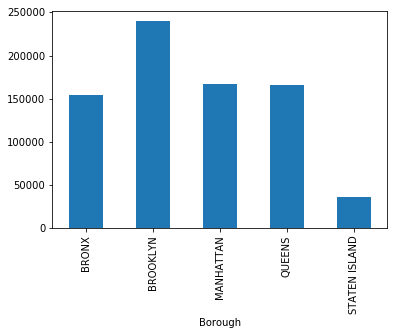

In [125]:
#now that we have our google map plotted let's analyze some more data
%matplotlib inline
#group by Borough
borough_group = data.groupby('Borough')
borough_group.size().plot(kind='bar')

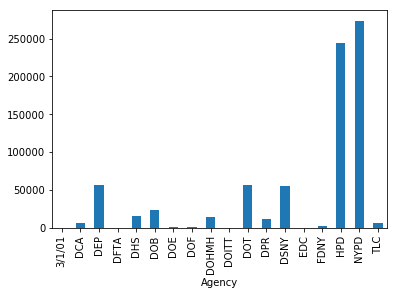

In [126]:
#group by Agency
agency_group = data.groupby('Agency')
agency_group.size().plot(kind='bar')

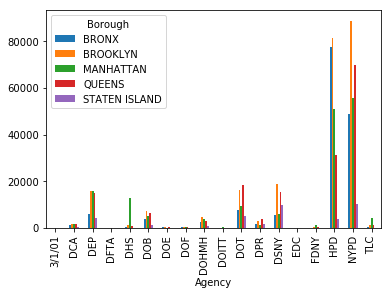

In [128]:
agency_borough.size().unstack().plot(kind='bar')

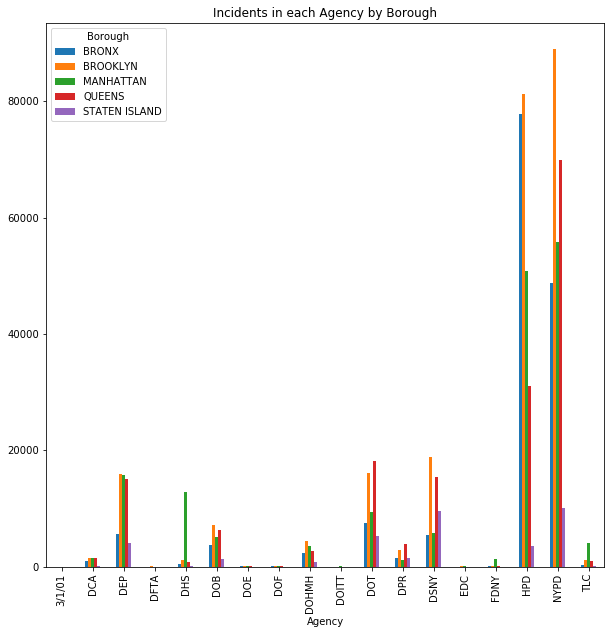

In [131]:
agency_borough = data.groupby(['Agency','Borough'])
agency_borough.size().unstack().plot(kind='bar',title="Incidents in each Agency by Borough",figsize=(10,10))

In [132]:
data['yyyymm'] = data['Created Date'].apply(lambda x:datetime.datetime.strftime(x,'%Y%m'))

In [133]:
data['yyyymm']

Unique Key
11        201609
12        201609
13        201609
14        201609
15        201609
16        201609
17        201609
18        201609
19        201609
20        201609
21        201609
22        201609
23        201609
24        201609
25        201609
26        201609
27        201609
28        201609
30        201609
31        201609
32        201609
33        201609
34        201609
35        201609
36        201609
37        201609
38        201609
39        201609
40        201609
41        201609
           ...  
971011    201609
971012    201609
971014    201609
971018    201609
971021    201609
971022    201609
971025    201609
971031    201609
971032    201609
971034    201609
971035    201609
971036    201609
971038    201609
971040    201609
971041    201609
971043    201609
971044    201609
971046    201609
971047    201609
971049    201609
971052    201609
971053    201609
971055    201609
971056    201609
971057    201609
971059    201609
971060    201609
971

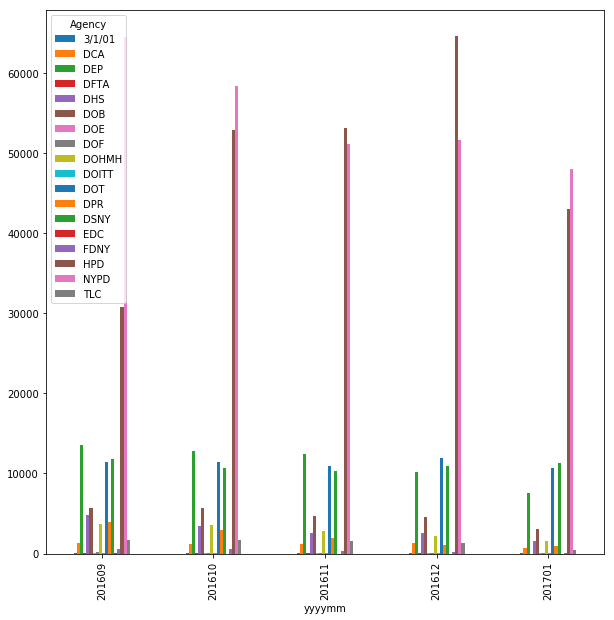

In [134]:
date_agency = data.groupby(['yyyymm','Agency'])
date_agency.size().unstack().plot(kind='bar',figsize=(10,10))

In [135]:
data.groupby('Agency').size().sort_values(ascending=False)

Agency
NYPD      273683
HPD       244425
DEP        56485
DOT        56361
DSNY       55007
DOB        23555
DHS        15083
DOHMH      13823
DPR        10830
TLC         6682
DCA         5760
FDNY        1676
DOF          579
DOE          454
DOITT        134
EDC          123
3/1/01       102
DFTA         101
dtype: int64

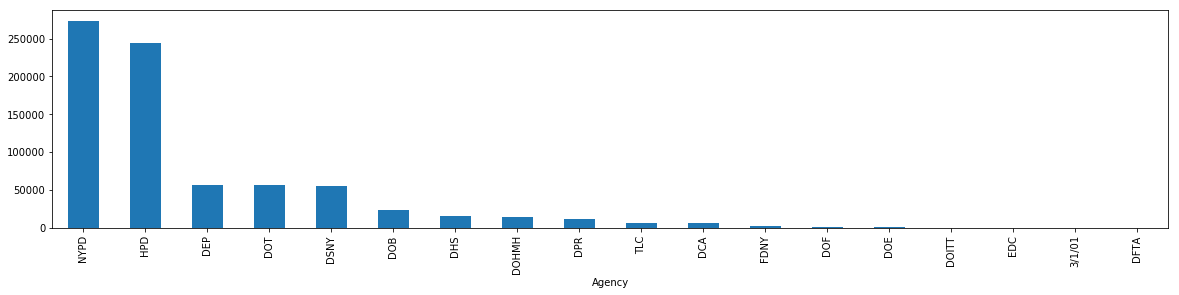

In [136]:
data.groupby('Agency').size().sort_values(ascending=False).plot(kind='bar', figsize=(20,4))

In [137]:
agency_borough = data.groupby(['Agency', 'Borough']).size().unstack()

In [138]:
agency_borough

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Agency,,,,,
3/1/01,17.0,28.0,23.0,28.0,6.0
DCA,958.0,1532.0,1529.0,1547.0,194.0
DEP,5679.0,15919.0,15781.0,15071.0,4035.0
DFTA,21.0,33.0,24.0,21.0,2.0
DHS,397.0,1130.0,12767.0,734.0,55.0
DOB,3767.0,7244.0,5018.0,6248.0,1278.0
DOE,129.0,127.0,49.0,136.0,13.0
DOF,143.0,161.0,153.0,112.0,10.0
DOHMH,2337.0,4385.0,3613.0,2770.0,718.0


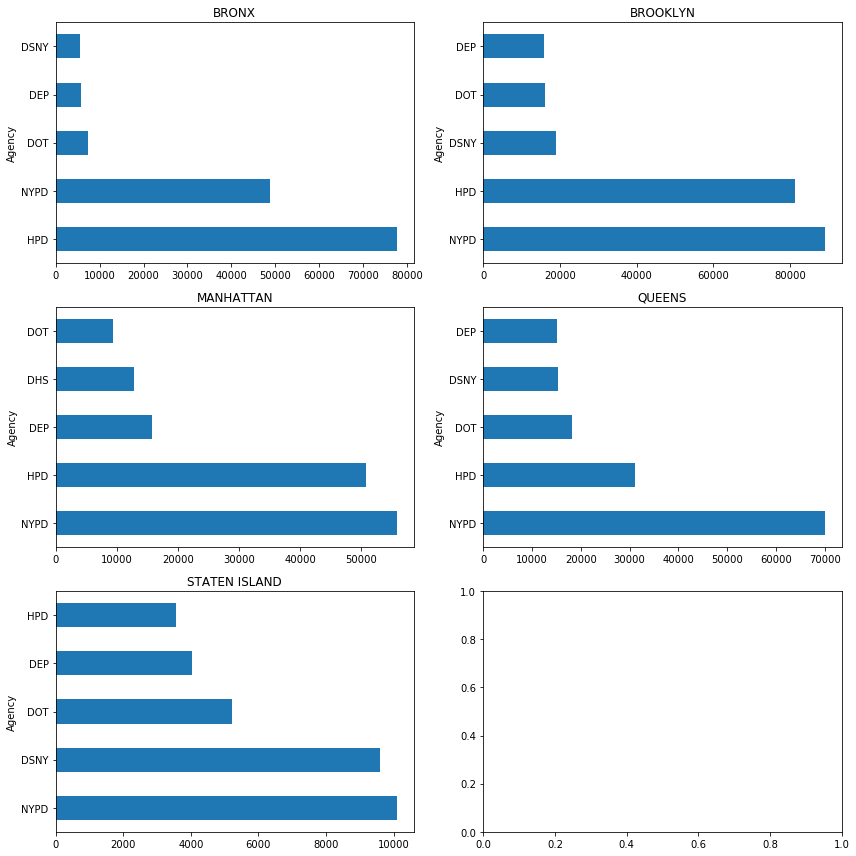

In [139]:
#We'll arrange the subplots in two rows and three columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 2
ROW_NUM = 3
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (label, col) in enumerate(agency_borough.iteritems()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    col = col.sort_values(ascending=False)[:5] 
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)

plt.tight_layout() 

In [140]:
for i, (label, col) in enumerate(agency_borough.iteritems()): 
    print(i,label,col)

0 BRONX Agency
3/1/01       17.0
DCA         958.0
DEP        5679.0
DFTA         21.0
DHS         397.0
DOB        3767.0
DOE         129.0
DOF         143.0
DOHMH      2337.0
DOITT         7.0
DOT        7465.0
DPR        1416.0
DSNY       5469.0
EDC           1.0
FDNY         39.0
HPD       77713.0
NYPD      48837.0
TLC         305.0
Name: BRONX, dtype: float64
1 BROOKLYN Agency
3/1/01       28.0
DCA        1532.0
DEP       15919.0
DFTA         33.0
DHS        1130.0
DOB        7244.0
DOE         127.0
DOF         161.0
DOHMH      4385.0
DOITT        18.0
DOT       16086.0
DPR        2929.0
DSNY      18856.0
EDC          62.0
FDNY        127.0
HPD       81281.0
NYPD      88973.0
TLC        1183.0
Name: BROOKLYN, dtype: float64
2 MANHATTAN Agency
3/1/01       23.0
DCA        1529.0
DEP       15781.0
DFTA         24.0
DHS       12767.0
DOB        5018.0
DOE          49.0
DOF         153.0
DOHMH      3613.0
DOITT        91.0
DOT        9391.0
DPR        1103.0
DSNY       5723.0
EDC    

In [141]:
grouped = data[['processing_time','Borough']].groupby('Borough')

In [142]:
grouped.describe()

processing_time
Borough                                     
BRONX         count                   154700
              mean    5 days 14:38:45.103167
              std    10 days 21:51:53.839334
              min            0 days 00:01:00
              25%            0 days 06:40:00
              50%            2 days 00:27:00
              75%            5 days 22:37:00
              max          145 days 00:24:00
BROOKLYN      count                   240074
              mean    5 days 07:39:32.320034
              std    12 days 02:39:05.523871
              min            0 days 00:01:00
              25%            0 days 03:12:00
              50%            1 days 00:00:00
              75%            4 days 16:20:00
              max          146 days 17:27:00
MANHATTAN     count                   167449
              mean    5 days 10:58:55.741031
              std    12 days 04:53:23.782359
              min            0 days 00:01:00
              25%            0 days 02:19:00
              50%            1 days 00:00:00
              75%            4 days 15:40:00
              max          139 days 22:42:00
QUEENS        count                   166335
              mean    5 days 06:20:15.405176
              std    13 days 10:56:12.466877
              min            0 days 00:01:00
              25%            0 days 02:50:00
              50%            0 days 14:37:00
              75%            4 days 03:42:30
              max          148 days 13:11:00
STATEN ISLAND count                    36305
              mean    5 days 09:38:14.356700
              std    12 days 08:35:28.442249
              min            0 days 00:01:00
              25%            0 days 04:09:00
              50%            1 days 01:52:00
              75%            5 days 00:08:00
              max          139 days 22:06:00

In [143]:
#The time it takes to process. Cleaned up
data['float_time'] =data['processing_time'].apply(lambda x:x/np.timedelta64(1, 'D'))

In [144]:
data

,Created Date,Closed Date,Agency,Incident Zip,Borough,Latitude,Longitude,processing_time,yyyymm,float_time
Unique Key,,,,,,,,,,
11,2016-09-01 00:33:00,2016-09-16 01:06:00,DCA,10001,MANHATTAN,40.744790,-73.988834,15 days 00:33:00,201609,15.022917
12,2016-09-01 20:16:00,2016-09-10 18:08:00,HPD,11691,QUEENS,40.600554,-73.750704,8 days 21:52:00,201609,8.911111
13,2016-09-01 12:17:00,2016-09-07 12:00:00,DSNY,11211,BROOKLYN,40.704925,-73.962007,5 days 23:43:00,201609,5.988194
14,2016-09-01 12:10:00,2016-09-10 14:23:00,HPD,10027,MANHATTAN,40.812322,-73.955338,9 days 02:13:00,201609,9.092361
15,2016-09-01 12:32:00,2016-09-11 02:03:00,HPD,10452,BRONX,40.839529,-73.922534,9 days 13:31:00,201609,9.563194
16,2016-09-01 20:16:00,2016-09-10 18:08:00,HPD,11691,QUEENS,40.600554,-73.750704,8 days 21:52:00,201609,8.911111
17,2016-09-01 08:35:00,2016-09-07 12:00:00,DSNY,11428,QUEENS,40.721866,-73.745982,6 days 03:25:00,201609,6.142361
18,2016-09-01 13:19:00,2016-09-16 14:32:00,DOT,11101,QUEENS,40.746875,-73.952711,15 days 01:13:00,201609,15.050694
19,2016-09-01 11:00:00,2016-09-08 12:00:00,DSNY,10075,MANHATTAN,40.773336,-73.955054,7 days 01:00:00,201609,7.041667


In [145]:
grouped = data[['float_time','Agency']].groupby('Agency')
grouped.mean().sort_values('float_time',ascending=False)

,float_time
Agency,
EDC,49.604031
FDNY,32.995218
TLC,25.815386
DPR,24.395774
DOITT,18.300145
DOB,18.250708
DOHMH,16.317311
DOE,11.360773
DCA,9.254593


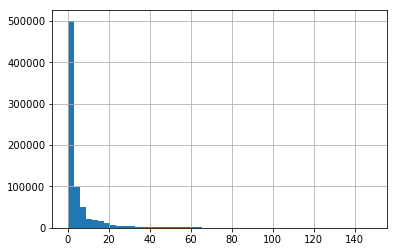

In [146]:
data['float_time'].hist(bins=50)